In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

Data Collection

In [7]:
data = pd.read_csv('Mall_Customers.csv')

TypeError: read_csv() got an unexpected keyword argument 'index'

In [12]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,,
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40


In [10]:
data.index = data['CustomerID']

In [13]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
#checking for null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income Column and Spending Score Column

In [17]:
X = data.iloc[:, [3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Finding number of clusters

WCSS: Within Clusters Sum of Squares

In [18]:
#finding WCSS valu for different number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

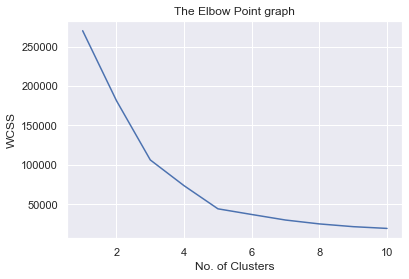

In [22]:
#plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point graph')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#therefore the optmum no of clusters is 5

Training the k-means model

In [23]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

#return a labelfor each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


Visualizing Clusters

In [ ]:
#plotting all clusters and theor centroids

plt.figure(figsize=(10,10))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='green', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='green', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='green', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='green', label='Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
           s=100, c='cyan', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.show()